# K-Nearest Neighbors

In [13]:
import numpy as np
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

## Data Processing

In [14]:
# load data
(x_train_val, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# normalize data
x_train = x_train_val.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# # data split
# x_train, x_val, y_train, y_val = train_test_split(
#     x_train_val, y_train_val, test_size=0.2, random_state=1234, stratify=y_train_val
# )

In [15]:
print("size of training data:", x_train.shape)
print("size of test data:", x_test.shape)

size of training data: (50000, 32, 32, 3)
size of test data: (10000, 32, 32, 3)


In [16]:
# flatten data
X_train = x_train.reshape(x_train.shape[0], -1)
X_test = x_test.reshape(x_test.shape[0], -1)
print("X_train flatten dimension:", X_train.shape)
print("X_test flatten dimension:", X_test.shape)

X_train flatten dimension: (50000, 3072)
X_test flatten dimension: (10000, 3072)


## Fitting Model

In [17]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
train_accuracy = knn.score(X_train, y_train)
val_accuracy = knn.score(X_test, y_test)
# test_accuracy = knn.score(X_test, y_test)
print("training accuracy:", train_accuracy)
print("test accuracy:", val_accuracy)
# print("test accuracy:", val_accuracy)

/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


training accuracy: 0.50534
test accuracy: 0.3398


In [24]:
y_pred = knn.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f1)

0.29620490652275805


### Testing different neighbor number

In [18]:
# neighbor_nums = [30, 50, 100, 200, 400]
# train_acc = []
# test_acc = []

# for k in neighbor_nums:
#     knn = KNeighborsClassifier(k)
#     knn.fit(X_train, y_train)
#     train_accuracy = knn.score(X_train, y_train)
#     test_accuracy = knn.score(X_test, y_test)
#     train_acc.append(train_accuracy)
#     test_acc.append(test_accuracy)


In [19]:
# ## visual display
# figure, axes = plt.subplots()
# axes.plot(neighbor_nums, train_acc, color = "green", label = "train_accuracy")
# axes.plot(neighbor_nums, test_acc, color = "red", label = "test_accuracy")
# axes.set_xlabel("k")
# axes.set_ylabel("Accuracy Rate")
# axes.legend()
# plt.plot()


In [20]:
neighbor_nums = [5, 10, 20, 40, 60]
train_acc = []
test_acc = []

for k in neighbor_nums:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train, y_train)
    train_accuracy = knn.score(X_train, y_train)
    val_accuracy = knn.score(X_test, y_test)
    train_acc.append(train_accuracy)
    test_acc.append(val_accuracy)

/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/home/xingyl26/llm/llm_model/lib/python3.12/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1

[]

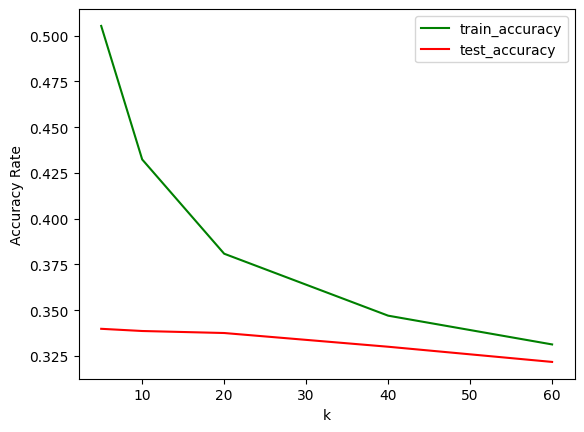

In [21]:
## visual display
figure, axes = plt.subplots()
axes.plot(neighbor_nums, train_acc, color = "green", label = "train_accuracy")
axes.plot(neighbor_nums, test_acc, color = "red", label = "test_accuracy")
axes.set_xlabel("k")
axes.set_ylabel("Accuracy Rate")
axes.legend()
plt.plot()